In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Activation,BatchNormalization,Flatten
from keras.utils import np_utils
from sklearn.utils import shuffle
import matplotlib.gridspec as gridspec
import glob
from keras.callbacks import ModelCheckpoint

# Loading the data

In [251]:
n = 23707
i = 0
images=[]
count=[]
gender=[]
age=[]
race = []
emotion=[]
data = []
i=0
size = (96,96)

In [252]:
path1 = "Desktop/UTKFace/*.*"
path2 = "Desktop/crop_part1/*.*"

In [253]:
for file in glob.glob(path1):
    img = cv2.imread(file)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img = cv2.resize(img,size)
    images.append(img)
    data=file.split("/")[2]
    age.append(data.split("_")[0])
    gender.append(file.split("_")[1])
    race.append(file.split("_")[2]) 
    count.append(i)
    i = i+1

    
for file in glob.glob(path1):
    img = cv2.imread(file)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img = cv2.resize(img,size)
    images.append(img)
    data=file.split("/")[2]
    age.append(data.split("_")[0])
    gender.append(file.split("_")[1])
    race.append(file.split("_")[2])
    count.append(i)
    i = i+1

# Processing the labels given in the dataset

In [58]:
age_label = ["Infants","Child","Teenager","Adult","Senior Citizen"]
gender_label =["Male","Female"]
race_label = ["British","African","Asian","Indian","Others"]

In [59]:
len(images)

47416

In [60]:
# making lists for storing the labels
age_status=[]
gender_status=[]
race_status = []

In [61]:
for i in range(len(images)):
    # for gender
    if(gender[i] == str(0)):
        gender_status.append(gender_label[0])
    elif(gender[i] == str(1)):
        gender_status.append(gender_label[1])
    
    # for race 
    if(race[i] == str(0)):
        race_status.append(race_label[0])
    elif(race[i] == str(1)):
        race_status.append(race_label[1])
    elif(race[i] == str(2)):
        race_status.append(race_label[2])
    elif(race[i] == str(3)):
        race_status.append(race_label[3])
    else:
        race_status.append(race_label[4])
    
    # for age
  

# Data Visualization

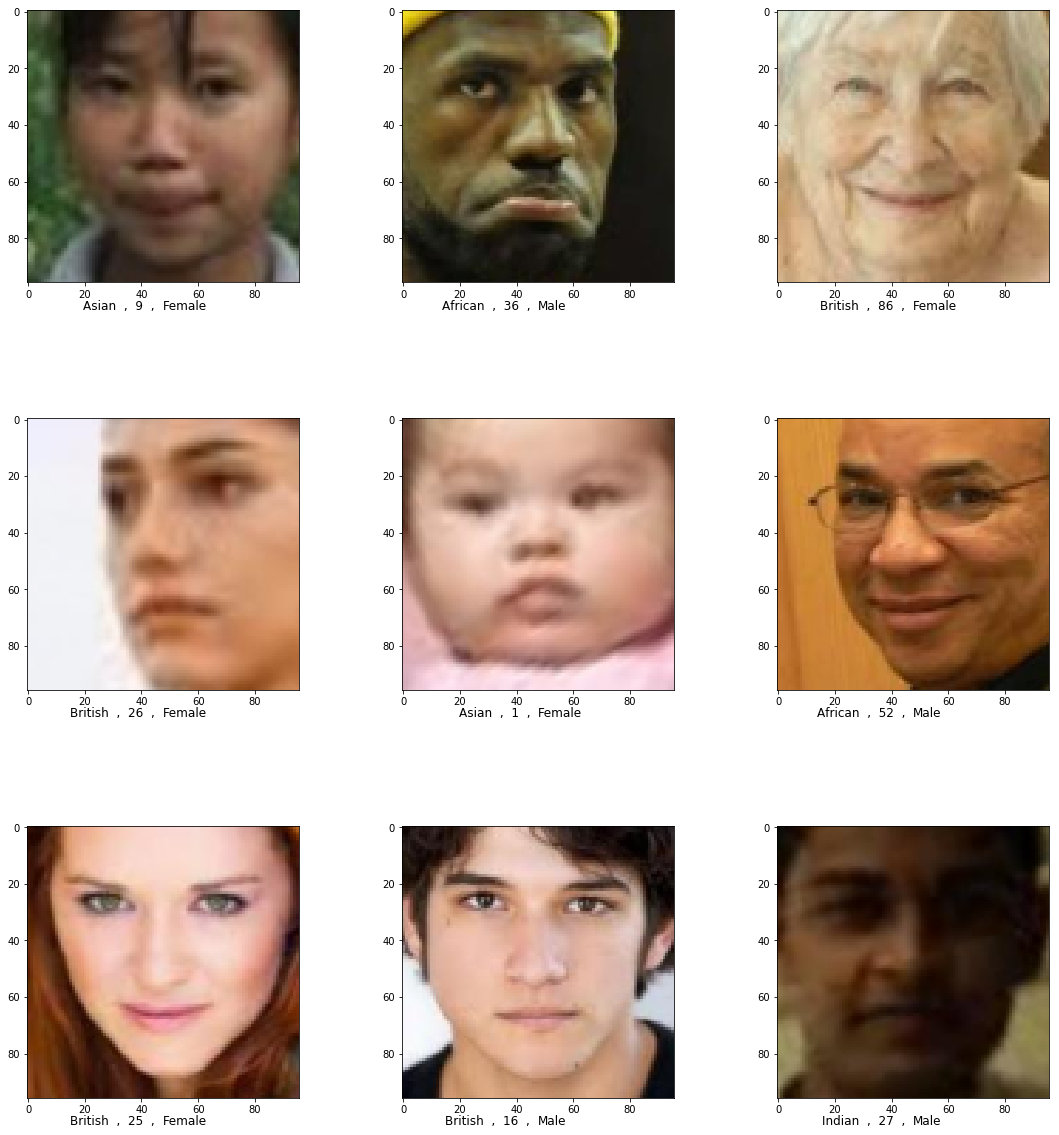

In [62]:
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0, 9):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.text(0.5,-0.1, "{0}".format(gender_status[i]), size=12, ha="left", transform=ax1.transAxes)
    ax1.text(0.5,-0.1, "{0}".format(race_status[i] +"  ,  " +str(age[i])+ "  ,  "), size=12, ha= "right", transform=ax1.transAxes)
    ax1.imshow(images[i])

# Taking some images for Testing

In [63]:
unseen_images = []
unseen_age = []
unseen_gender = []
unseen_race = []

In [64]:
for i in range(18):
    unseen_images.append(images[i*100])
    unseen_age.append(age[i*100])
    unseen_gender.append(gender_status[i*100])
    unseen_race.append(race_status[i*100])

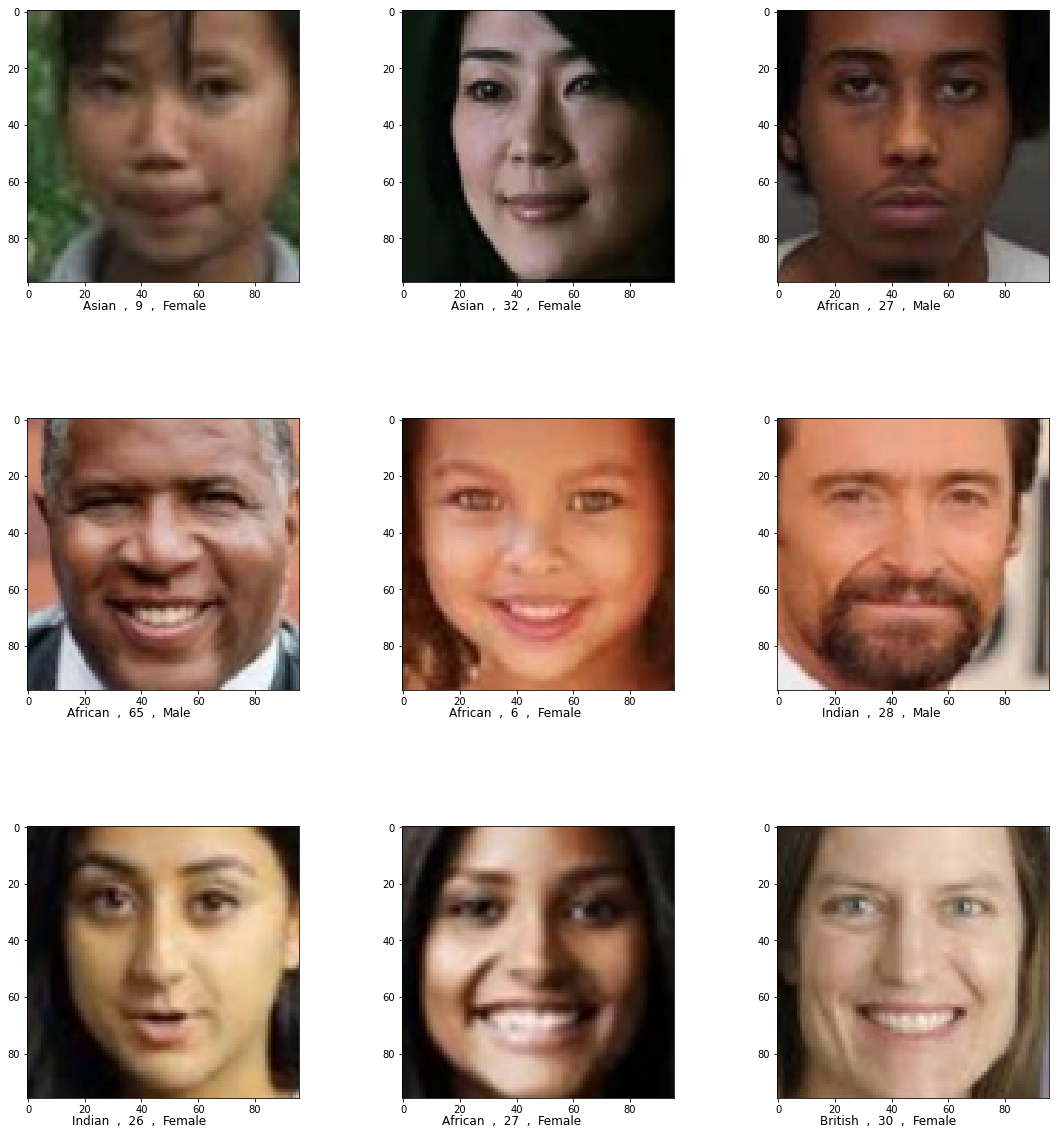

In [65]:
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0, 9):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.text(0.5,-0.1, "{0}".format(unseen_gender[i]), size=12, ha="left", transform=ax1.transAxes)
    ax1.text(0.5,-0.1, "{0}".format(unseen_race[i] +"  ,  " +str(unseen_age[i])+ "  ,  "), size=12, ha= "right", transform=ax1.transAxes)
    ax1.imshow(unseen_images[i])

# Making data ready for Machine

In [66]:
# converting data into numpy array
age_np = np.array(age)
race_np = np.array(race)
gender_np = np.array(gender)
images_np = np.array(images)

In [67]:
# making data into 0 and 1
encoder = LabelEncoder()

In [68]:
# for gender
gender_class = 2
gender_encoder = encoder.fit_transform(gender_np)
gender_onehot = np_utils.to_categorical(gender_encoder,gender_class)

In [69]:
# for race
race_onehot = pd.get_dummies(race_np)
race_onehot = np.array(race_onehot)
race_onehot = np.delete(race_onehot , [3,4], 1)
race_onehot = np.delete(race_onehot , 3,1)
race_onehot

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [70]:
# for age
age_class = 116
age_encoder = encoder.fit_transform(age_np)
age_onehot = np_utils.to_categorical(age_encoder,age_class)

In [71]:
print(gender_onehot[0:3])
print(race_onehot[0:3])

[[0. 1.]
 [1. 0.]
 [0. 1.]]
[[0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]]


In [72]:
age_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Models for Gender Classification

In [73]:
# for gender
images_train,images_test,gender_train,gender_test = train_test_split(images_np,gender_onehot,test_size=0.25)

In [74]:
#model1 for gender classification
model=Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=3,input_shape=(96,96,3),activation="relu"))
model.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu"))
model.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(100,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

filepath="./saved_models/best_model_6k96_ignore.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model.compile(optimizer="adadelta",loss="categorical_crossentropy",metrics=["accuracy"])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 94, 94, 3)         84        
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 94, 94, 10)        280       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 47, 47, 10)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 45, 45, 3)         273       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 41, 41, 5)         380       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 20, 20, 5)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 10, 10, 10)       

In [234]:
model.fit(images_train,gender_train, validation_data=(images_test,gender_test),batch_size=64,epochs=5,callbacks=[checkpoint])

Train on 35562 samples, validate on 11854 samples
Epoch 1/5
35562/35562 [==============================] - 211s 6ms/step - loss: 0.0823 - accuracy: 0.9693 - val_loss: 0.1779 - val_accuracy: 0.9482
Epoch 2/5
35562/35562 [==============================] - 190s 5ms/step - loss: 0.0766 - accuracy: 0.9701 - val_loss: 0.1706 - val_accuracy: 0.9490
Epoch 3/5
35562/35562 [==============================] - 191s 5ms/step - loss: 0.0783 - accuracy: 0.9722 - val_loss: 0.1529 - val_accuracy: 0.9537
Epoch 4/5
35562/35562 [==============================] - 200s 6ms/step - loss: 0.0704 - accuracy: 0.9740 - val_loss: 0.1568 - val_accuracy: 0.9569
Epoch 5/5
35562/35562 [==============================] - 199s 6ms/step - loss: 0.0737 - accuracy: 0.9731 - val_loss: 0.1535 - val_accuracy: 0.9582


In [236]:
model.evaluate(images_test,gender_test)# 15 epochs

11854/11854 [==============================] - 25s 2ms/step


[0.15349105448786232, 0.9582419395446777]

# Model 2 for Nationality Classification

In [81]:
# for nation
images2_train,images2_test,race_train,race_test = train_test_split(images_np,race_onehot,test_size=0.25)

In [82]:
model2=Sequential()
model2.add(Conv2D(kernel_size=(3,3),filters=3,input_shape=(96,96,3),activation="relu"))
model2.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu"))
model2.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu"))
model2.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model2.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model2.add(Flatten())
model2.add(Dropout(0.3))
model2.add(Dense(500,activation="relu"))
model2.add(Dense(5,activation="softmax"))
model2.summary()

filepath="./saved_models/best_model_6k96_ignore.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model2.compile(optimizer="adadelta",loss="categorical_crossentropy",metrics=["accuracy"])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 94, 94, 3)         84        
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 94, 94, 10)        280       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 47, 47, 10)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 45, 45, 3)         273       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 41, 41, 5)         380       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 20, 20, 5)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 10, 10, 10)      

In [237]:
model2.fit(images2_train,race_train, validation_data=(images2_test,race_test),batch_size=64,epochs=5,callbacks=[checkpoint])

Train on 35562 samples, validate on 11854 samples
Epoch 1/5
35562/35562 [==============================] - 201s 6ms/step - loss: 0.1027 - accuracy: 0.9670 - val_loss: 0.3474 - val_accuracy: 0.9303
Epoch 2/5
35562/35562 [==============================] - 192s 5ms/step - loss: 0.1000 - accuracy: 0.9682 - val_loss: 0.3338 - val_accuracy: 0.9242
Epoch 3/5
35562/35562 [==============================] - 193s 5ms/step - loss: 0.0960 - accuracy: 0.9682 - val_loss: 0.3883 - val_accuracy: 0.9307
Epoch 4/5
35562/35562 [==============================] - 193s 5ms/step - loss: 0.0921 - accuracy: 0.9715 - val_loss: 0.3601 - val_accuracy: 0.9295
Epoch 5/5
35562/35562 [==============================] - 194s 5ms/step - loss: 0.0934 - accuracy: 0.9707 - val_loss: 0.3542 - val_accuracy: 0.9305


In [238]:
model2.evaluate(images2_test,race_test)

11854/11854 [==============================] - 21s 2ms/step


[0.3541621923765948, 0.9304875731468201]

# Model  3 for Age Classification

In [91]:
# for age
images3_train,images3_test,age_train,age_test = train_test_split(images_np,age_onehot,test_size=0.25)

In [92]:
model3=Sequential()
model3.add(Conv2D(kernel_size=(3,3),filters=3,input_shape=(96,96,3),activation="relu"))
model3.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model3.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu"))
model3.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu"))
model3.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model3.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model3.add(Flatten())
model3.add(Dropout(0.3))
model3.add(Dense(400,activation="relu"))
model3.add(Dense(116,activation="softmax"))
model3.summary()

filepath="./saved_models/best_model_6k96_ignore.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model3.compile(optimizer="adadelta",loss="categorical_crossentropy",metrics=["accuracy"])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 94, 94, 3)         84        
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 94, 94, 10)        280       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 47, 47, 10)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 45, 45, 3)         273       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 41, 41, 5)         380       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 20, 20, 5)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 10, 10, 10)      

In [243]:
model3.fit(images3_train,age_train, validation_data=(images3_test,age_test),batch_size=64,epochs=5,callbacks=[checkpoint])

Train on 35562 samples, validate on 11854 samples
Epoch 1/5
35562/35562 [==============================] - 199s 6ms/step - loss: 0.3842 - accuracy: 0.8862 - val_loss: 1.9719 - val_accuracy: 0.7752
Epoch 2/5
35562/35562 [==============================] - 200s 6ms/step - loss: 0.3853 - accuracy: 0.8840 - val_loss: 1.7909 - val_accuracy: 0.7712
Epoch 3/5
35562/35562 [==============================] - 201s 6ms/step - loss: 0.3777 - accuracy: 0.8856 - val_loss: 1.8643 - val_accuracy: 0.7743
Epoch 4/5
35562/35562 [==============================] - 207s 6ms/step - loss: 0.3738 - accuracy: 0.8868 - val_loss: 1.9075 - val_accuracy: 0.7738
Epoch 5/5
35562/35562 [==============================] - 206s 6ms/step - loss: 0.3674 - accuracy: 0.8899 - val_loss: 1.8359 - val_accuracy: 0.7754


In [244]:
model3.evaluate(images3_test,age_test)

11854/11854 [==============================] - 21s 2ms/step


[1.8359343101911125, 0.7753500938415527]

In [108]:
import matplotlib.gridspec as gridspec

In [166]:
def gender_predicts(unseen_images,model):
    img = cv2.resize(unseen_images,size)
    img = np.reshape(img,(1,96,96,3))
    pr = model.predict(img)    
    pr = np.array(pr)[0]
    idx = np.argmax(pr)
    conf = round(pr[idx]*100,2)
    lab = gender_label[idx]
    return lab,conf

In [167]:
def race_predicts(images,model):
    img = cv2.resize(images,size)
    img = np.reshape(img,(1,96,96,3))
    pr = model2.predict(img)    
    pr = np.array(pr)[0]
    idx = np.argmax(pr)
    conf = round(pr[idx]*100,2)
    lab = race_label[idx]
    return lab,conf

In [168]:
age_label

['Infants', 'Child', 'Teenager', 'Adult', 'Senior Citizen']

In [169]:
age_label2 = []
i=1
while(i!=117):
    age_label2.append(i)
    i = i+1

In [170]:
max(age_label2)

116

In [171]:
min(age_label2)

1

In [178]:
def gender_predicts(x,model):
    img = cv2.resize(x,(96,96))
    img = np.reshape(img,(1,96,96,3))
    pr = model.predict(img)    
    pr = np.array(pr)[0]
    idx = np.argmax(pr)
    conf = round(pr[idx]*100,2)
    lab = gender_label[idx]
    return lab,conf

In [181]:
def race_predicts(x,model):
    img = cv2.resize(x,(96,96))
    img = np.reshape(img,(1,96,96,3))
    pr = model2.predict(img)    
    pr = np.array(pr)[0]
    idx = np.argmax(pr)
    conf = round(pr[idx]*100,2)
    lab = race_label[idx]
    return lab,conf

In [235]:
def age_predicts(x,model):
    img = cv2.resize(x,(96,96))
    img = np.reshape(img,(1,96,96,3))
    pr = model3.predict(img)    
    pr = np.array(pr)[0]
    idx = np.argmax(pr)
    conf = round(pr[idx]*100,2)
    lab = age_label2[idx]
    return lab,conf

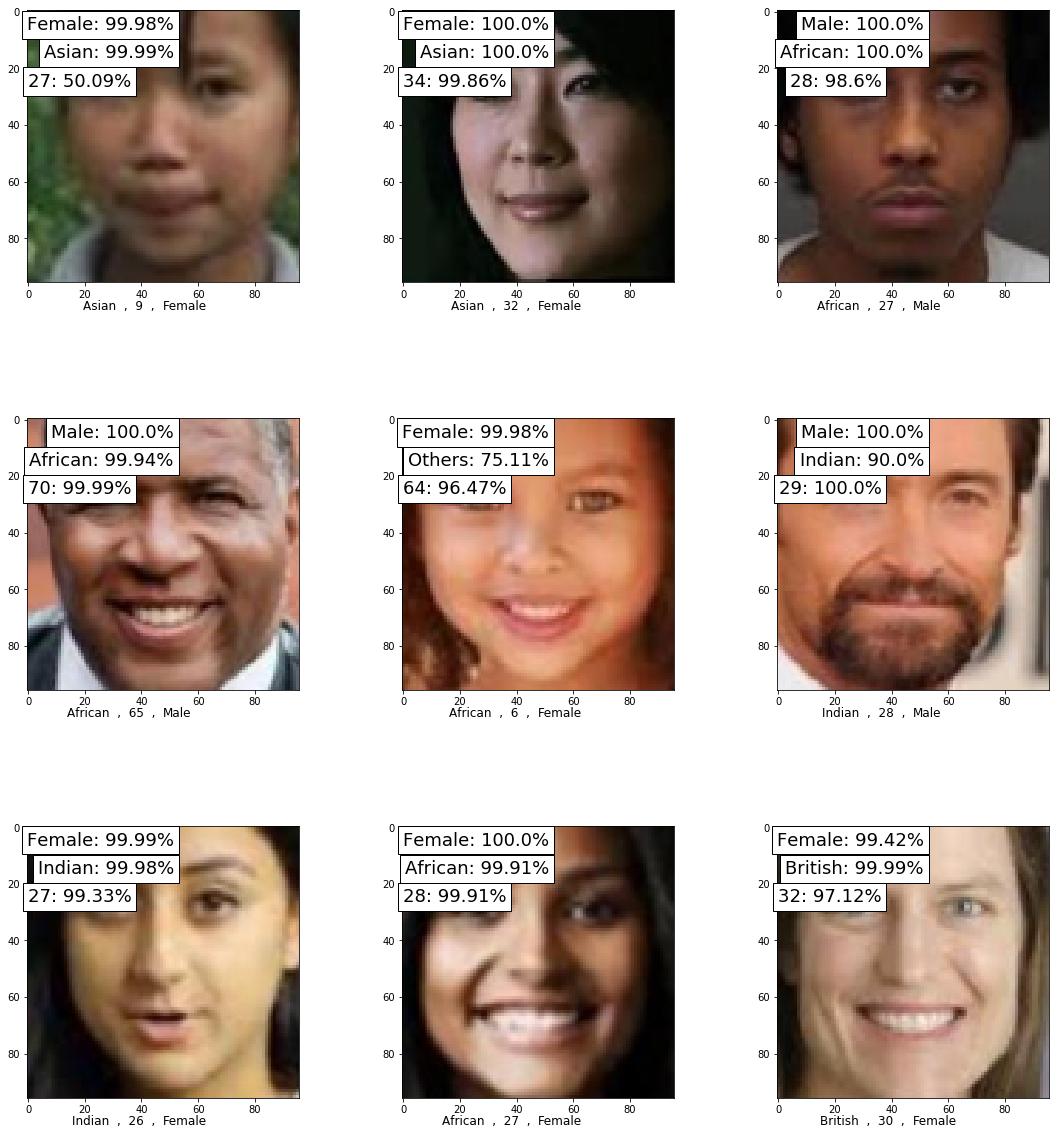

In [245]:
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0, 9):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.text(0.5,-0.1, "{0}".format(unseen_gender[i]), size=12, ha="left", transform=ax1.transAxes)
    ax1.text(0.5,-0.1, "{0}".format(unseen_race[i] +"  ,  " +str(unseen_age[i])+ "  ,  "), size=12, ha= "right", transform=ax1.transAxes)
    pr_gender,conf_gender = gender_predicts(unseen_images[i],model)
    pr_race,conf_race = race_predicts(unseen_images[i],model2)
    pr_age,conf_age = age_predicts(unseen_images[i],model3)
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr_gender,conf_gender),
    fontsize = 18,
    xy=(50, 0), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='right',
    )
    ax1.annotate(
    s = '{0}: {1}%'.format(pr_race,conf_race),
    fontsize = 18,
    xy=(50, 10), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='right',
    )
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr_age,conf_age),
    fontsize = 18,
    xy=(35, 20), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='right',
    )
    ax1.imshow(unseen_images[i])

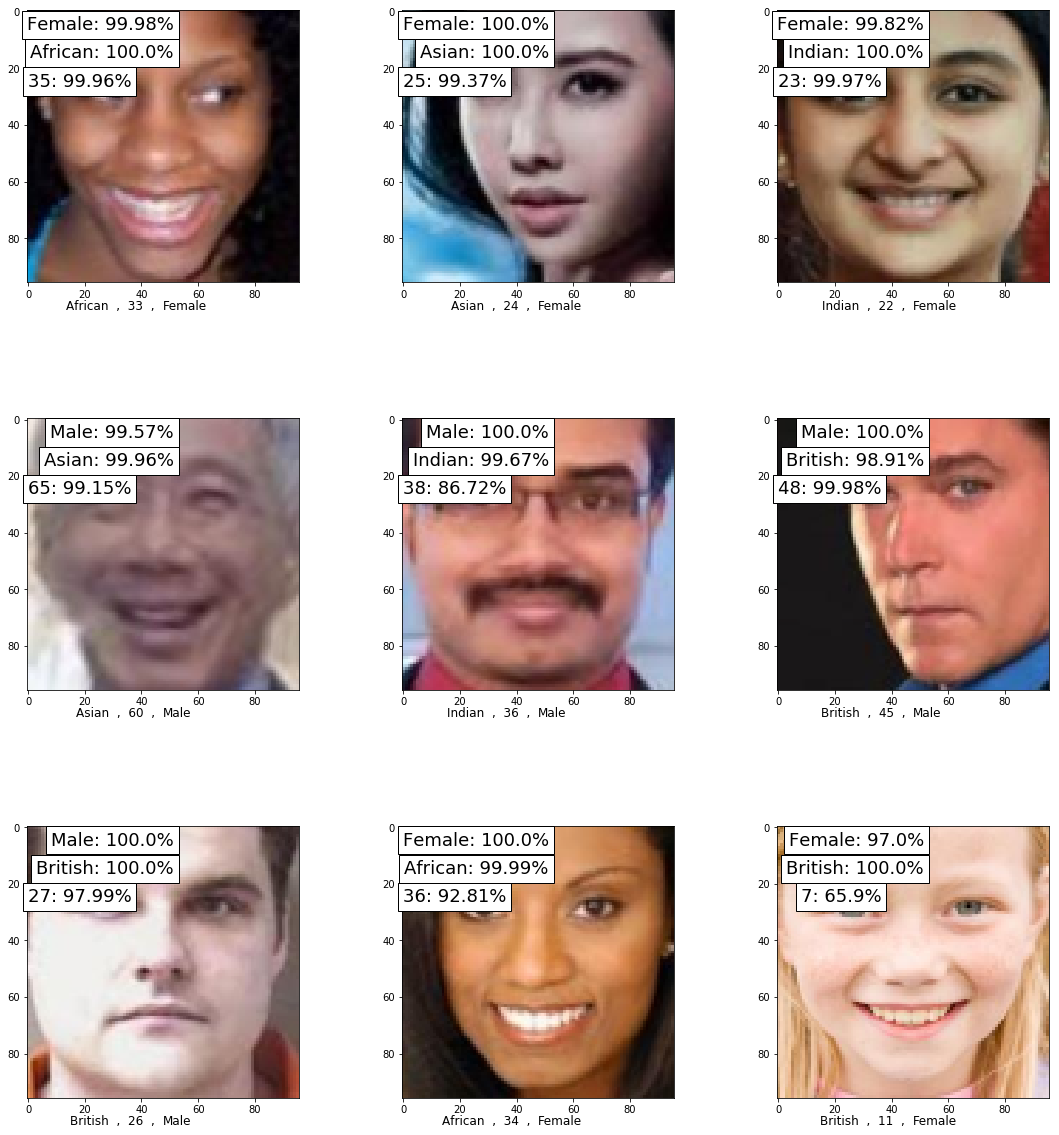

In [263]:
w = i+1200
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0,9 ):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.text(0.5,-0.1, "{0}".format(gender_status[i+w]), size=12, ha="left", transform=ax1.transAxes)
    ax1.text(0.5,-0.1, "{0}".format(race_status[i+w] +"  ,  " +str(age[i+w])+ "  ,  "), size=12, ha= "right", transform=ax1.transAxes)
    
    pr_gender,conf_gender = gender_predicts(images[i+w],model)
    pr_race,conf_race = race_predicts(images[i+w],model2)
    pr_age,conf_age = age_predicts(images[i+w],model3)
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr_gender,conf_gender),
    fontsize = 18,
    xy=(50, 0), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='right',
    )
    ax1.annotate(
    s = '{0}: {1}%'.format(pr_race,conf_race),
    fontsize = 18,
    xy=(50, 10), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='right',
    )
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr_age,conf_age),
    fontsize = 18,
    xy=(35, 20), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='right',
    )
    
    
    
    
    ax1.imshow(images[i+w])

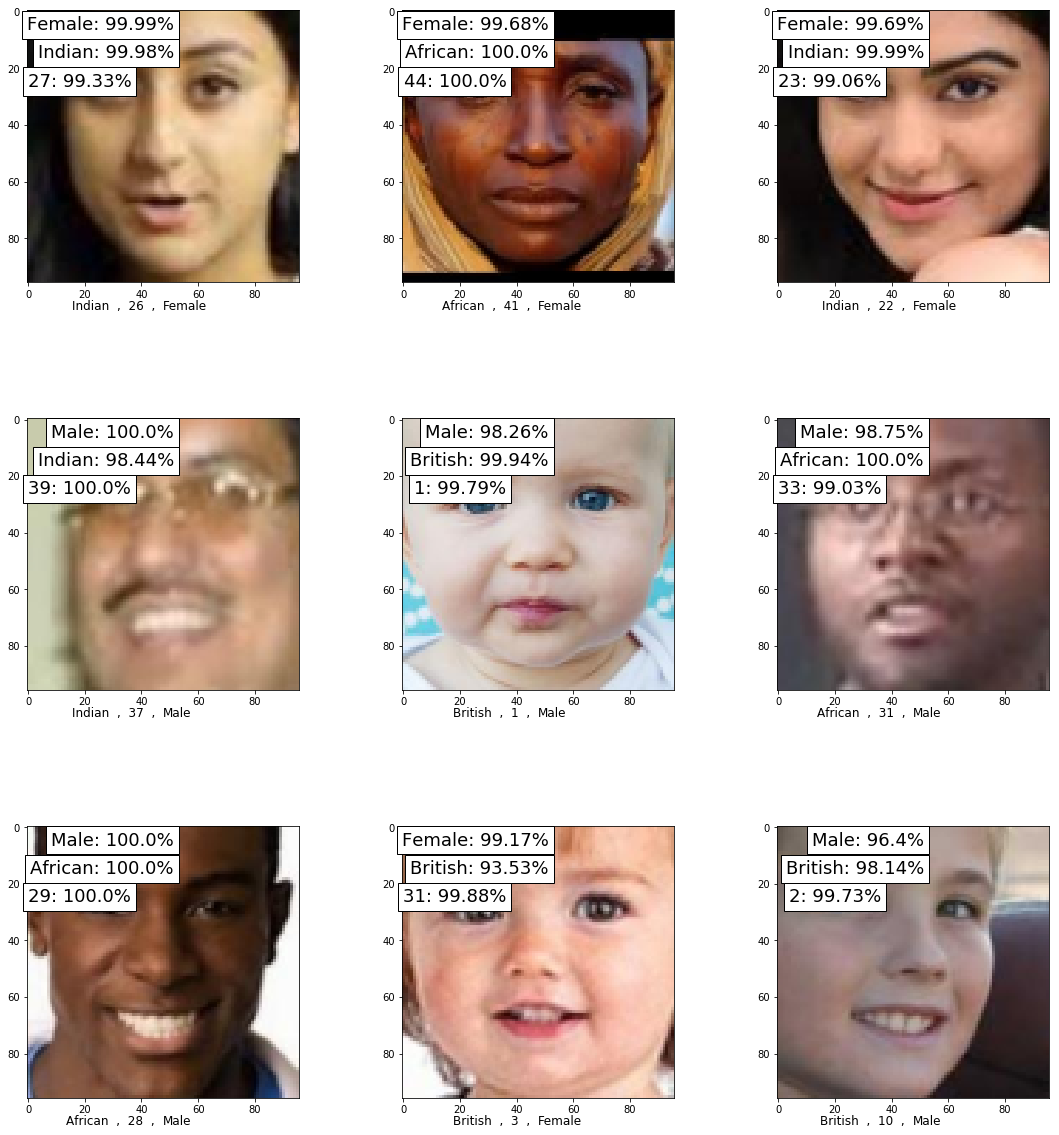

In [258]:
w = i+300
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0,9 ):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.text(0.5,-0.1, "{0}".format(gender_status[i+w]), size=12, ha="left", transform=ax1.transAxes)
    ax1.text(0.5,-0.1, "{0}".format(race_status[i+w] +"  ,  " +str(age[i+w])+ "  ,  "), size=12, ha= "right", transform=ax1.transAxes)
    
    pr_gender,conf_gender = gender_predicts(images[i+w],model)
    pr_race,conf_race = race_predicts(images[i+w],model2)
    pr_age,conf_age = age_predicts(images[i+w],model3)
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr_gender,conf_gender),
    fontsize = 18,
    xy=(50, 0), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='right',
    )
    ax1.annotate(
    s = '{0}: {1}%'.format(pr_race,conf_race),
    fontsize = 18,
    xy=(50, 10), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='right',
    )
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr_age,conf_age),
    fontsize = 18,
    xy=(35, 20), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='right',
    )
    
    
    
    
    ax1.imshow(images[i+w])

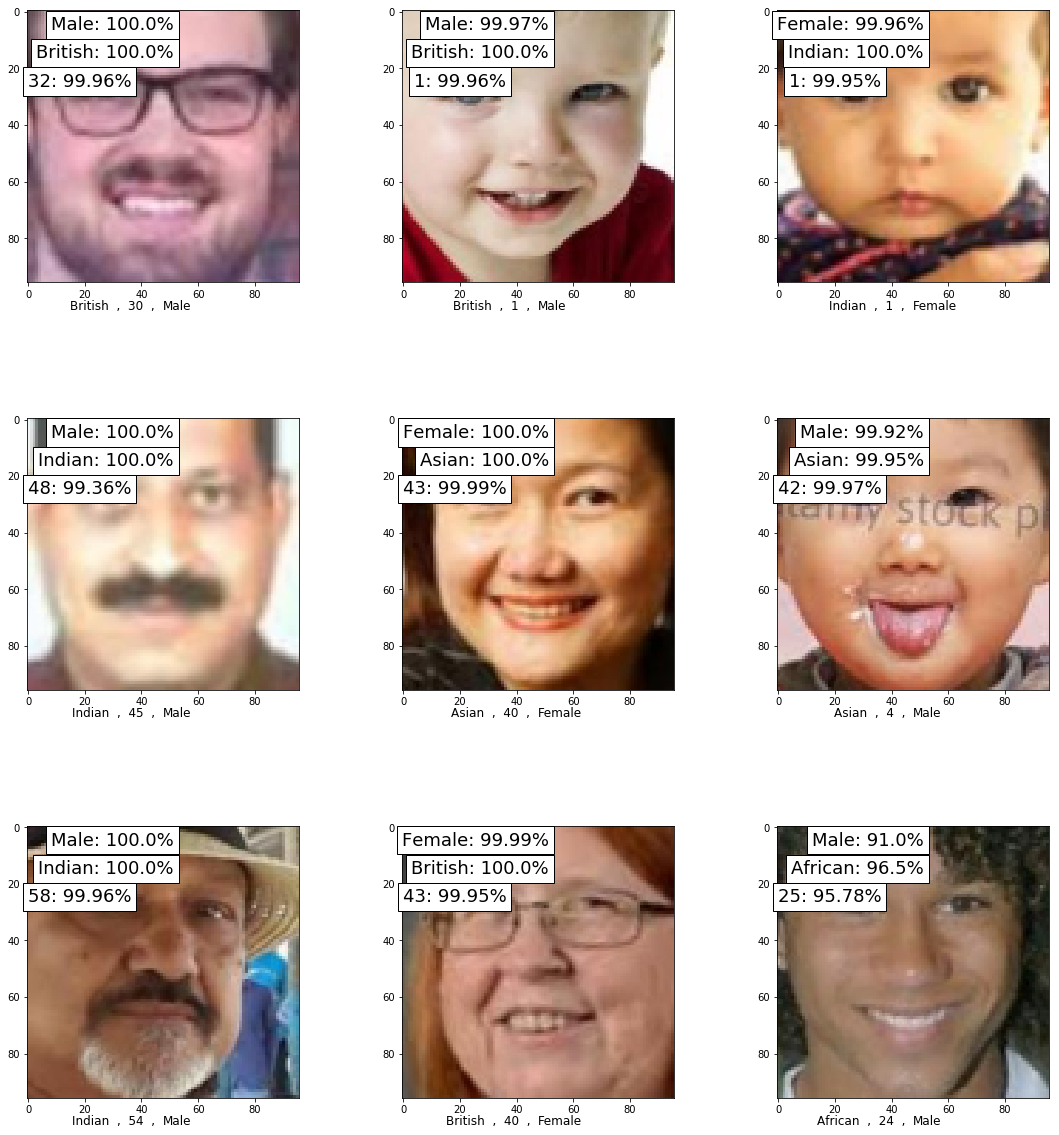

In [261]:
w = i+2600
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0,9 ):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.text(0.5,-0.1, "{0}".format(gender_status[i+w]), size=12, ha="left", transform=ax1.transAxes)
    ax1.text(0.5,-0.1, "{0}".format(race_status[i+w] +"  ,  " +str(age[i+w])+ "  ,  "), size=12, ha= "right", transform=ax1.transAxes)
    
    pr_gender,conf_gender = gender_predicts(images[i+w],model)
    pr_race,conf_race = race_predicts(images[i+w],model2)
    pr_age,conf_age = age_predicts(images[i+w],model3)
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr_gender,conf_gender),
    fontsize = 18,
    xy=(50, 0), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='right',
    )
    ax1.annotate(
    s = '{0}: {1}%'.format(pr_race,conf_race),
    fontsize = 18,
    xy=(50, 10), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='right',
    )
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr_age,conf_age),
    fontsize = 18,
    xy=(35, 20), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='right',
    )
    
    
    
    
    ax1.imshow(images[i+w])

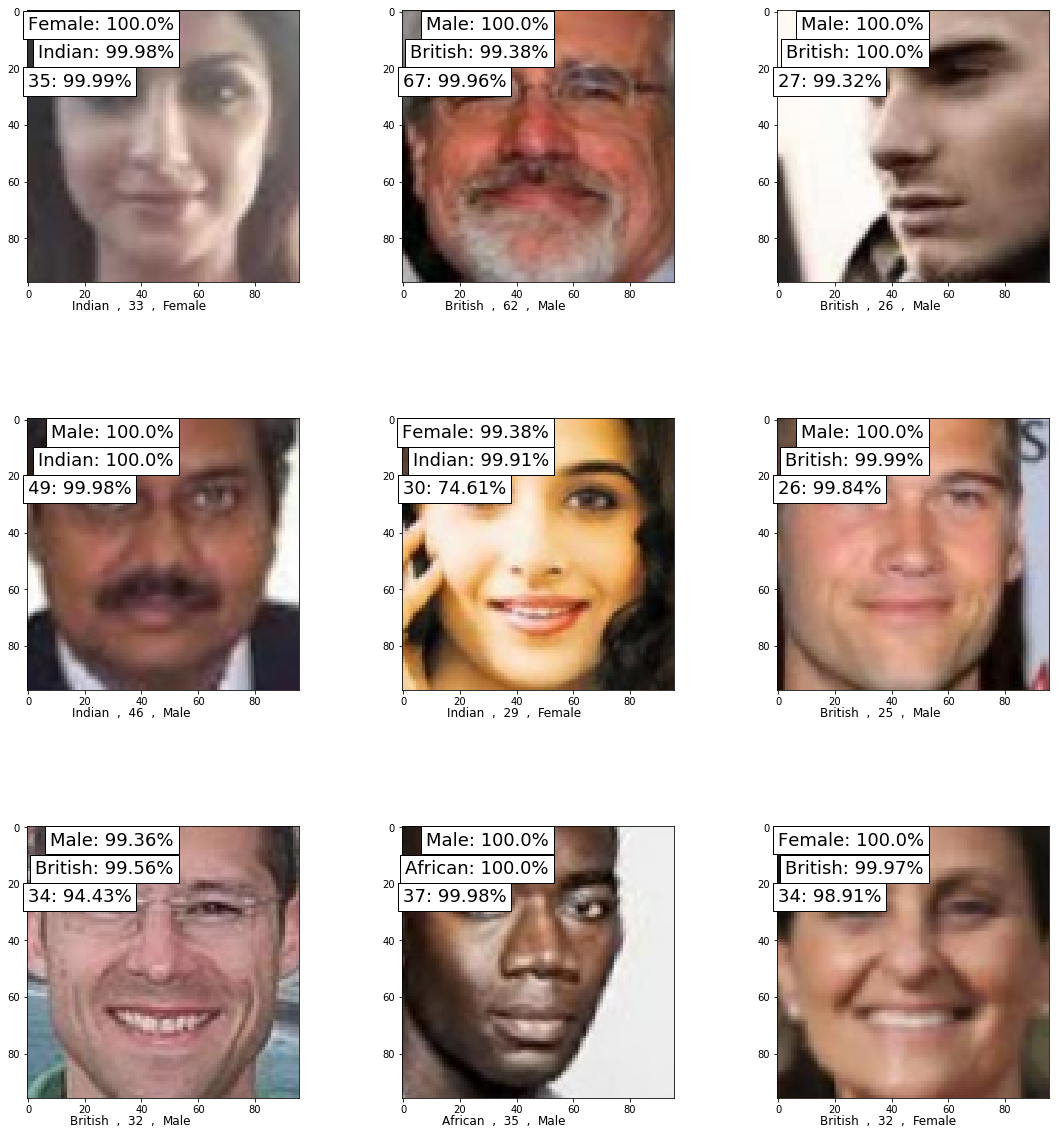

In [260]:
w = i+1600
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0,9 ):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.text(0.5,-0.1, "{0}".format(gender_status[i+w]), size=12, ha="left", transform=ax1.transAxes)
    ax1.text(0.5,-0.1, "{0}".format(race_status[i+w] +"  ,  " +str(age[i+w])+ "  ,  "), size=12, ha= "right", transform=ax1.transAxes)
    
    pr_gender,conf_gender = gender_predicts(images[i+w],model)
    pr_race,conf_race = race_predicts(images[i+w],model2)
    pr_age,conf_age = age_predicts(images[i+w],model3)
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr_gender,conf_gender),
    fontsize = 18,
    xy=(50, 0), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='right',
    )
    ax1.annotate(
    s = '{0}: {1}%'.format(pr_race,conf_race),
    fontsize = 18,
    xy=(50, 10), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='right',
    )
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr_age,conf_age),
    fontsize = 18,
    xy=(35, 20), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='right',
    )
    
    
    
    
    ax1.imshow(images[i+w])